In [3]:
library(DiscriMiner)
library(MASS)
library(klaR)
library(scatterplot3d)

In [2]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


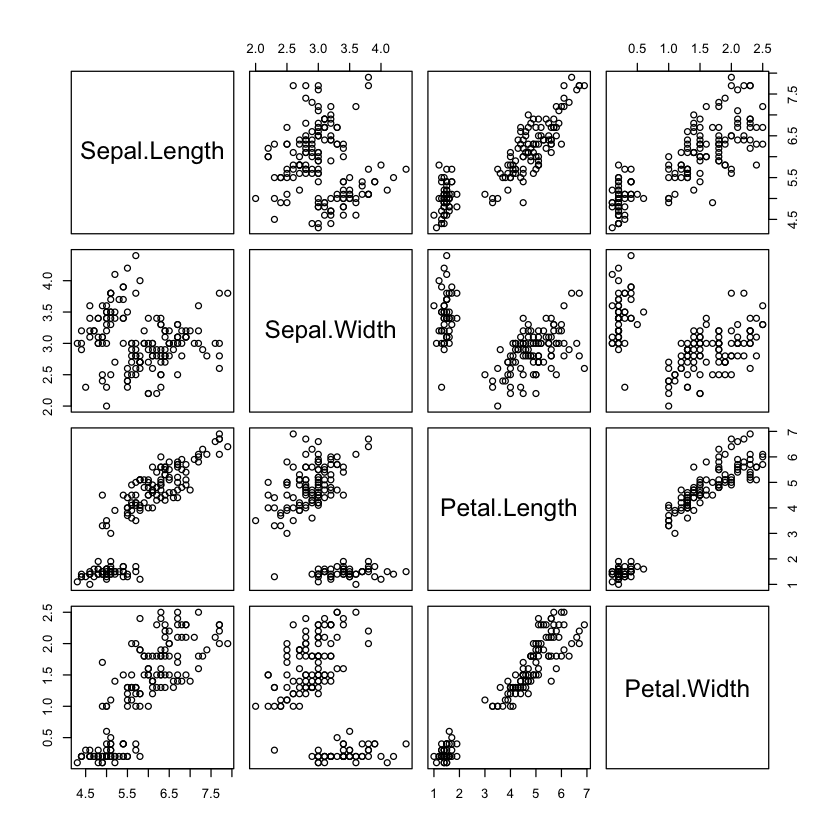

In [1]:
plot(iris[-5])

## Linear Discriminant Analysis

In [14]:
my_lin1 = linDA(iris[, 1:4], iris$Species)
my_lin1$confusion

            predicted
original     setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49

## TRAINING and TEST sets

In [12]:
set.seed(111)
obs = sample(1:nrow(iris), 100)
train.iris = iris[obs, 1:5]
test.iris<-iris[-c(obs),]

## Model

In [18]:
lda = linDA(train.iris[1:4], train.iris$Species)
lda$confusion

            predicted
original     setosa versicolor virginica
  setosa         32          0         0
  versicolor      0         34         2
  virginica       0          1        31

### compare the results against original class

In [24]:
test_classify = classify(lda, test.iris[1:4])
table(test.iris$Species, test_classify$pred_class)

            
             setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         14         0
  virginica       0          1        17

## Visualization

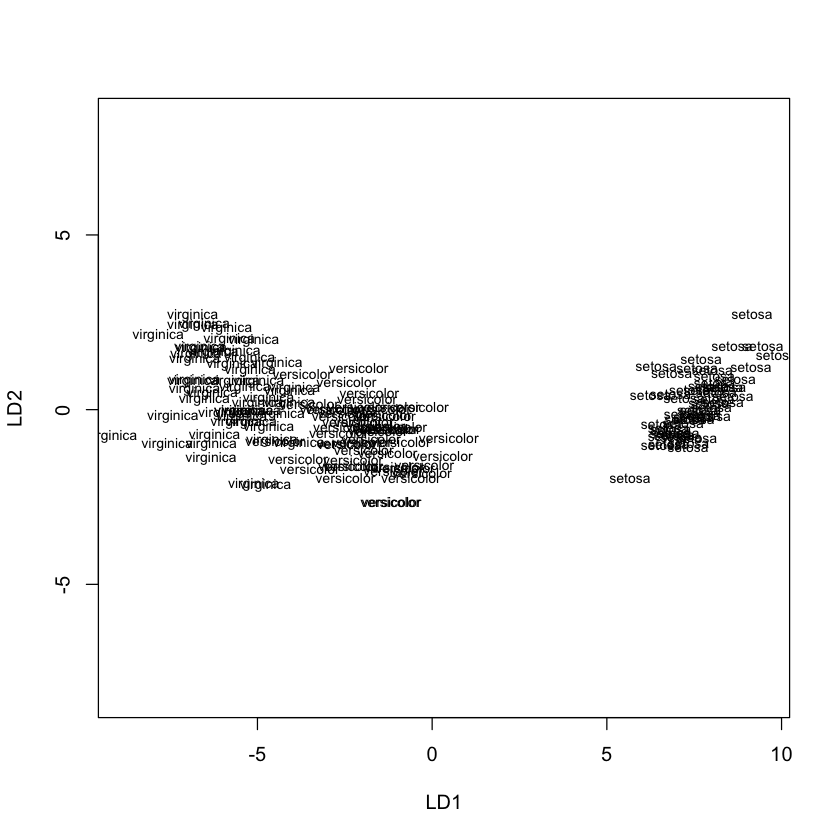

In [28]:
fit = lda(Species~., data=iris, na.action="na.omit", CV=FALSE)
plot(fit)

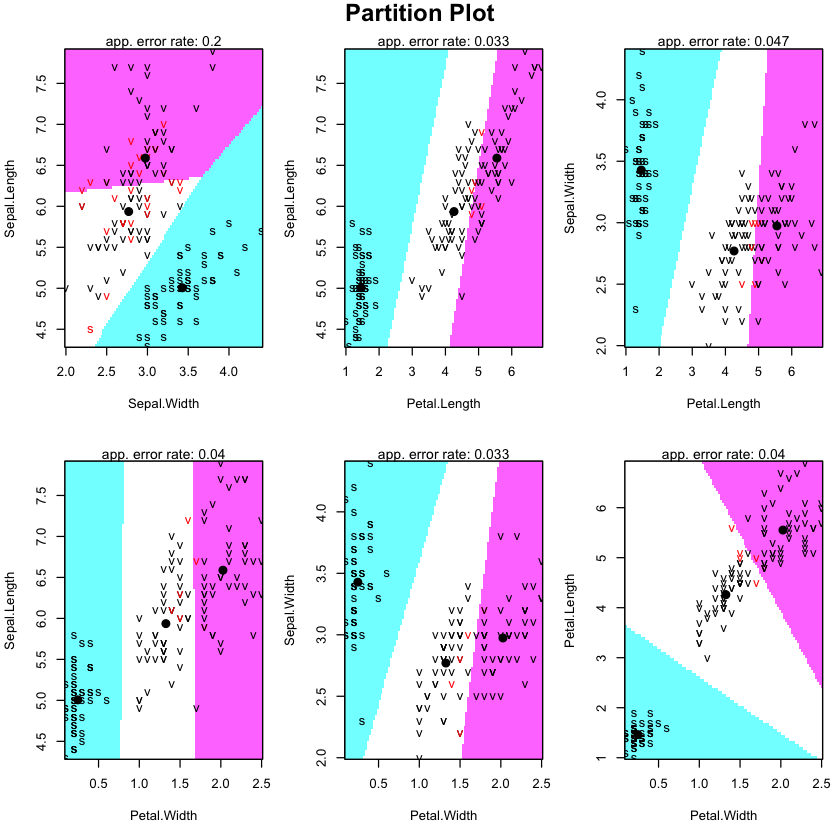

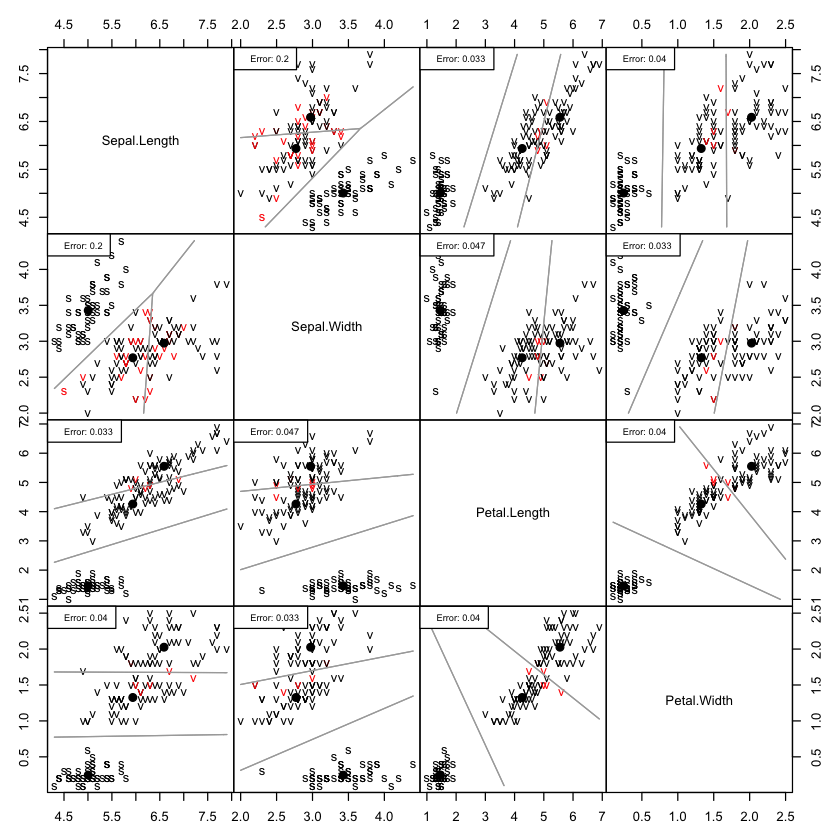

In [33]:
partimat(Species~.,data=iris,method="lda") 
partimat(Species ~ ., data = iris, method = "lda", plot.matrix = TRUE, imageplot = FALSE) 

#### 3D Plot of Discrimination Scores

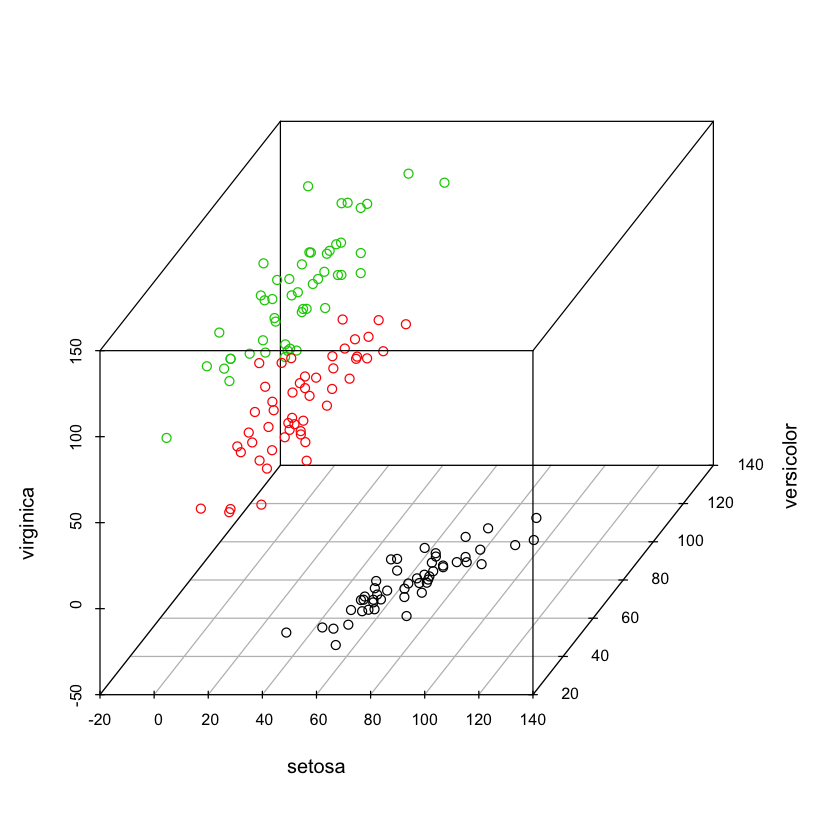

In [36]:
setosa=(my_lin1 $scores)[,1]
versicolor=(my_lin1 $scores)[,2]
virginica=(my_lin1 $scores)[,3]
scatterplot3d (setosa, versicolor, virginica, color=c(rep(1,50), rep(2,50), rep(3,50)))